# Experimental Results on the COVID19 data

## Import of the libraries and our package

In [1]:
import numpy as np
import numpy.linalg as npl
import numpy.random as npr

import scipy as sp
import scipy.linalg as spl
import scipy.stats as sps
import time
import pandas as pd

import matplotlib.pyplot as plt

In [2]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2

from covid import * #allows us to use our functions directly

[16086063.89197191 16335240.41101021 16443575.0298233  16554761.9291886
 16569296.82523136 16560364.37325124 16562354.86713048 16584310.53982906
 16622056.004799   16665463.85896529 16707801.81112667 16731138.93211309
 16728098.9870839  16722636.51474873 16719049.1960994  16711812.18281568
 16698151.04088608 16683830.13051819 16670423.70006559 16659875.6780882
 16650820.41452388 16642048.30966657 16633425.5607074  16628941.557677
 16628629.6824577  16631316.5624767  16637465.14957803 16646569.77000902
 16658656.78457293 16673177.26120863 16689137.85852177 16702670.17104972
 16717069.05901146 16732663.51149778 16746762.00844601 16753935.24059008
 16753372.59463738 16747766.5595075  16739931.62833328 16732068.7825907
 16724768.92659877 16718802.95482024 16713610.97116262 16709865.95009967
 16707174.20803498 16705880.42284399 16706334.30816863 16708066.08314036
 16710695.58909566 16713901.69886153 16718318.20908514 16723570.62840057
 16729568.05004344 16734225.97656268 16738162.67265424 1

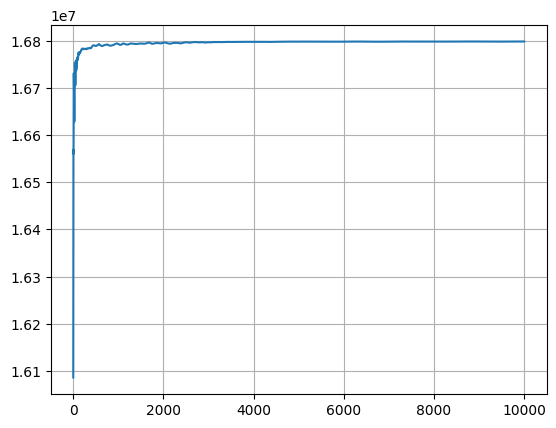

In [28]:
plt.figure()
log_pi_val = PD3S('stuff/FranceData_Z.csv', 'stuff/FranceData_Zphi.csv')
plt.plot(log_pi_val[:10000])
plt.grid()